In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tomatoleaf/tomato/cnn_train.py
/kaggle/input/tomatoleaf/tomato/val/Tomato___Late_blight/0db85707-41f9-42df-ba3b-842d14f00a68___GHLB2 Leaf 8909.JPG
/kaggle/input/tomatoleaf/tomato/val/Tomato___Late_blight/0fca6d09-1931-4767-a195-1dd2b7cd10b7___GHLB Leaf 8 Day 12.JPG
/kaggle/input/tomatoleaf/tomato/val/Tomato___Late_blight/Tomato___Late_blight_original_0ba7d3d8-5c4c-4365-ba0c-69f61e96a36e___RS_Late.B 5312.JPG_0c8b3e88-9afa-41e1-a767-122ad7b27ac2.JPG
/kaggle/input/tomatoleaf/tomato/val/Tomato___Late_blight/1b212ad6-e65a-4467-bfd1-9f9139070d33___GHLB2 Leaf 8609.JPG
/kaggle/input/tomatoleaf/tomato/val/Tomato___Late_blight/1d6d043a-9df9-49ec-9b0f-e40a8e7f409f___RS_Late.B 5287.JPG
/kaggle/input/tomatoleaf/tomato/val/Tomato___Late_blight/1d83eef4-92a0-42a2-9ea7-1ec2e683dbc0___GHLB2 Leaf 8809.JPG
/kaggle/input/tomatoleaf/tomato/val/Tomato___Late_blight/01ebf21e-ef94-4c92-b007-0b26741c2fc8___GHLB2 Leaf 9075.JPG
/kaggle/input/tomatoleaf/tomato/val/Tomato___Late_blight/1f38a263-cfb5-

# **IMPORTING LIBRARIES**

In [2]:
import numpy as np
import os
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
import tensorflow as tf
import matplotlib.pyplot as plt

import pathlib
import pandas as pd
import numpy as np
import seaborn as sns
import random

import warnings
warnings.filterwarnings("ignore")


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

# **SETTING DIRECTORY**

In [3]:
base_dir='/kaggle/input/tomatoleaf/tomato'

train_dir='/kaggle/input/tomatoleaf/tomato/train'
print("train data:", len(os.listdir(train_dir)))

val_dir='/kaggle/input/tomatoleaf/tomato/val'
print("val data:", len(os.listdir(val_dir)))

train data: 10
val data: 10


In [4]:
train_data_directory = pathlib.Path('/kaggle/input/tomatoleaf/tomato/train')
class_names = sorted([item.name for item in train_data_directory.glob('*')])
print(class_names)

['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


In [5]:
val_data_directory = pathlib.Path('/kaggle/input/tomatoleaf/tomato/val')
class_names = sorted([item.name for item in train_data_directory.glob('*')])
print(class_names)

['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


# **IMAGE DATA GENERATOR**

In [6]:
train_data_gen=ImageDataGenerator(rescale = 1/255.)
test_data_gen=ImageDataGenerator(rescale=1/255.)

train_data = train_data_gen.flow_from_directory(train_dir, 
                                          target_size = (224, 224), 
                                          batch_size = 32,
                                          class_mode = 'categorical')
val_data = test_data_gen.flow_from_directory(val_dir, 
                                        target_size = (224, 224), 
                                        batch_size = 32,
                                        class_mode = 'categorical')

Found 10000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [7]:
images, labels = train_data.next()
len(images), len(labels), images[0].shape

(32, 32, (224, 224, 3))

In [8]:
images1, labels1 = val_data.next()
len(images1), len(labels1), images1[0].shape

(32, 32, (224, 224, 3))

In [9]:
train_data, val_data

(<keras.preprocessing.image.DirectoryIterator at 0x783550eaca90>,
 <keras.preprocessing.image.DirectoryIterator at 0x783550eac220>)

# **CNN**

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation, Flatten, Dropout, Dense

In [11]:
model = Sequential()

model.add(Conv2D(128, (3, 3),input_shape=(224,224,3)))
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3)))
model.add(Activation("relu"))

model.add(Conv2D(128, (3, 3)))
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3)))
model.add(Activation("relu"))

model.add(Conv2D(128, (3, 3)))
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1029))
model.add(Activation("relu"))

model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation("softmax"))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 128)     3584      
                                                                 
 activation (Activation)     (None, 222, 222, 128)     0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 74, 74, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 128)       147584    
                                                                 
 activation_1 (Activation)   (None, 72, 72, 128)       0         
                                                        

# **MODEL TRAINING**

In [13]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
history=model.fit(train_data,validation_data=val_data,batch_size=32,verbose=1,epochs=15)

Epoch 1/15


2023-07-24 18:17:41.969600: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


313/313 [==============================] - 90s 239ms/step - loss: 1.8458 - accuracy: 0.3161 - val_loss: 1.1218 - val_accuracy: 0.6180
Epoch 2/15
313/313 [==============================] - 57s 181ms/step - loss: 1.0129 - accuracy: 0.6450 - val_loss: 0.8025 - val_accuracy: 0.7110
Epoch 3/15
313/313 [==============================] - 56s 177ms/step - loss: 0.7302 - accuracy: 0.7389 - val_loss: 0.6978 - val_accuracy: 0.7470
Epoch 4/15
313/313 [==============================] - 55s 176ms/step - loss: 0.5693 - accuracy: 0.7985 - val_loss: 0.6585 - val_accuracy: 0.7630
Epoch 5/15
313/313 [==============================] - 55s 175ms/step - loss: 0.4469 - accuracy: 0.8461 - val_loss: 0.5805 - val_accuracy: 0.7990
Epoch 6/15
313/313 [==============================] - 55s 174ms/step - loss: 0.3721 - accuracy: 0.8726 - val_loss: 0.8414 - val_accuracy: 0.7500
Epoch 7/15
313/313 [==============================] - 54s 173ms/step - loss: 0.3105 - accuracy: 0.8960 - val_loss: 0.5528 - val_accuracy: 0.8

# **EVALUATE**

In [15]:
model.evaluate(train_data, verbose=1)

313/313 [==============================] - 23s 72ms/step - loss: 0.0119 - accuracy: 0.9983


[0.011850093491375446, 0.9983000159263611]

# **MODEL SAVING**

In [16]:
model.save_weights("model_weights.hdf5")
model.save("tomato.hdf5")

# **MODEL TRAINING**

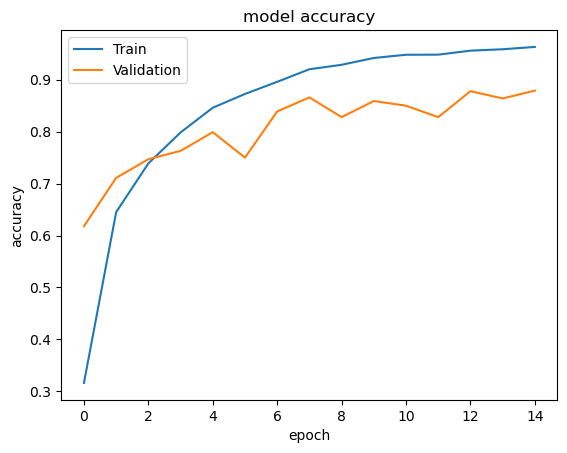

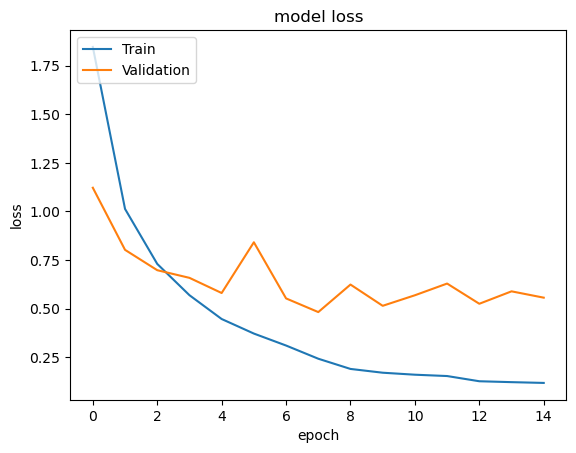

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# **LOADING THE MODEL**

In [18]:
loaded_model = tf.keras.models.load_model('/kaggle/working/tomato.hdf5')

# **IMAGE PREPROCESSING**

In [19]:
def preprocess_images(path):
    img = image.load_img(path, target_size=(224, 224))

    img_array = image.img_to_array(img)

    img_array = np.expand_dims(img_array, axis=0)

    img_preprocessed = img_array / 255.0
    
    return img_preprocessed

# **IMAGE PREDICTION**

1/1 [==============================] - 0s 464ms/step
Predicted class    :    Tomato___Tomato_Yellow_Leaf_Curl_Virus


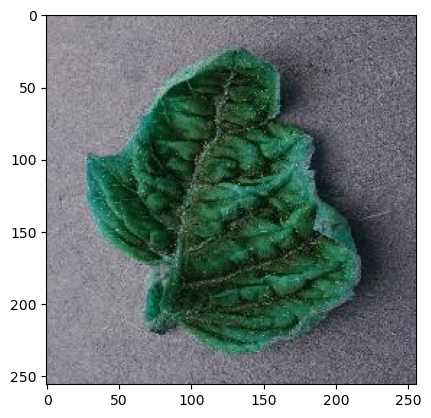

In [20]:
import cv2
t=cv2.imread('/kaggle/input/tomatoleaf/tomato/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/cfdbbfba-3cdc-4aa2-9c43-cddeff7f6d73___YLCV_NREC 0309.JPG')
plt.imshow(t)
img_path = "/kaggle/input/tomatoleaf/tomato/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/cfdbbfba-3cdc-4aa2-9c43-cddeff7f6d73___YLCV_NREC 0309.JPG"
img = preprocess_images(img_path)
prediction = loaded_model.predict(img)

predicted_class_index = np.argmax(prediction)

class_labels = ["Tomato___Bacterial_spot","Tomato___Early_blight","Tomato___Late_blight","Tomato___Leaf_Mold"
                ,"Tomato___Septoria_leaf_spot","Tomato___Spider_mites Two-spotted_spider_mite",
                "Tomato___Target_Spot","Tomato___Tomato_Yellow_Leaf_Curl_Virus","Tomato___Tomato_mosaic_virus",
                "Tomato___healthy"] 
predicted_class_label = class_labels[predicted_class_index]

print("Predicted class    :   ", predicted_class_label)